In [205]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import string
import math

#Importamos el DF que exportamos previamente a csv en "Cleaning_DS_v2":
DF_Jobs_and_Candidates = pd.read_csv('DF_Exportado_Jobs_And_Candidates.csv')
DF_Jobs_and_Candidates.tail()

,Candidate_Name,Content_CV,clean_Content_CV,tokens_Content_CV,Job_Title,Job_Description,clean_Job_Description,tokens_Job_Description,Keywords,Cosine_Job_Desc,WMD_Job_Desc
95,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Machine Learning Engineer 2,collaborate with a multidisciplinary team to g...,collaborate multidisciplinary team gain insigh...,"['collaborate', 'multidisciplinary', 'team', '...","2+, knowledge, of, with, experience, collabora...",0.158,0.496
96,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Security Specialist,work in a fast-paced environment that combine ...,work fast-paced environment combine technical ...,"['work', 'fast-paced', 'environment', 'combine...","experience, with, work, fast-paced, combine, o...",0.154,0.501
97,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Security Specialist 2,\n handling incoming requests for assistanc...,handling incoming requests assistance business...,"['handling', 'incoming', 'request', 'assistanc...","security, of, handling, incoming, requests, fo...",0.115,0.486
98,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Web Developer Full Stack,\n\n graduate degree in information technol...,graduate degree information technology similar...,"['graduate', 'degree', 'information', 'technol...","experience, written, typescript), skills, and,...",0.188,0.490
99,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Web Developer Full Stack 2,\n· enter existing website codebases and exten...,enter existing website codebases extend functi...,"['enter', 'existing', 'website', 'codebases', ...","5, (required), enter, existing, website, codeb...",0.204,0.507


In [206]:
#Nos quedamos con las columnas necesarias:
DF_J_and_C = DF_Jobs_and_Candidates.loc[:, ['Candidate_Name', 'Job_Title', 'Cosine_Job_Desc', 'WMD_Job_Desc']]
DF_J_and_C

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


### Aplicamos k-means:

In [207]:
#1ro un ejemplo de kmeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):
from sklearn.cluster import KMeans
import numpy as np

#Suponemos X nuestro DF con 2 features para entrenar KNN:
#Por ejemplo 1,1,1,10,10,10 es uno de nuestros features.
             #y 2,4,0,2,4,0 es el otro de nuestros features.
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

#Ahora entrenamos kmeans con 2 clusters (k = 2):
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#Y luego de entrenarlo obtenemos nuestros labels (nuestros resultados: a qué k pertenece cada vector
#que definimos arriba en "X")

kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [208]:
#Ahora vamos a predecir con nuevos 2 nuevos valores/vectores:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [209]:
#Vemos la posición en X e Y de nuestros 2 centroides:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

### Ahora si, a nuestro ejemplo concreto:

In [210]:
#Librerias:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [211]:
#X y Y son nuestros FEATURES:
X = np.array(DF_J_and_C["Cosine_Job_Desc"])
Y = np.array(DF_J_and_C['WMD_Job_Desc'])
Y.shape

Data = {'x': X,
        'y': Y
       }
  
df = DataFrame(Data,columns=['x','y'])

In [212]:
#Entrenamos Kmeans con todo nuestro DF:
#(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]¶

kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.07241667 0.47875   ]
 [0.477      0.547     ]
 [0.18036    0.49808   ]
 [0.33042857 0.508     ]
 [0.12611111 0.48919444]]
[4 2 0 0 4 4 0 0 0 0 2 2 0 0 4 4 0 0 0 0 2 2 3 1 2 4 4 0 0 4 4 0 2 3 4 4 4
 0 4 4 1 1 2 2 1 1 2 4 2 4 3 1 2 2 1 1 2 4 4 2 4 4 4 2 2 0 3 3 0 2 0 4 4 4
 2 4 3 3 4 0 0 0 0 4 4 4 4 0 2 4 4 4 4 4 2 2 2 4 2 2]


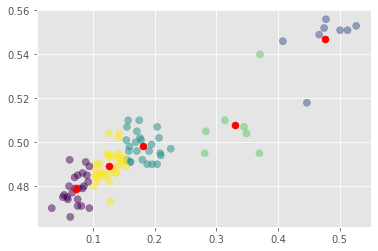

In [213]:
#Ploteamos los centroides de cada grupo:

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label = 'centroids')
plt.show()

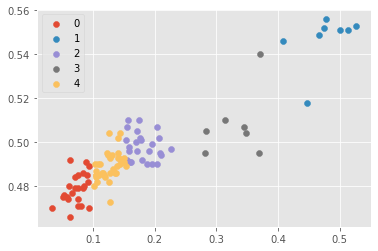

In [214]:
#Ploteamos cada grupo:

fig, ax = plt.subplots()
scatter_x = np.array(DF_J_and_C["Cosine_Job_Desc"])
scatter_y = np.array(DF_J_and_C['WMD_Job_Desc'])
group = np.array(kmeans.labels_)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

In [215]:
#Añadimos la columna al DF:
new_column =  kmeans.labels_
DF_J_and_C['Result K-means'] = new_column
DF_J_and_C

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result K-means
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489,4
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494,2
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480,0
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475,0
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485,4
...,...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496,2
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501,2
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486,4
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490,2


In [217]:
DF_J_and_C.tail(20)

new_df =  DF_J_and_C[(DF_J_and_C['Result K-means']==3) | (DF_J_and_C['Result K-means']==1)]
new_df

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result K-means
22,HCM_Federico_Calonge,HCM Consultant,0.370,0.495,3
23,HCM_Federico_Calonge,HCM Consultant 2,0.447,0.518,1
33,HCM_Robert_Smith,HCM Consultant 2,0.283,0.505,3
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546,1
41,ML_Engineer_Bradly_Johnston,Data Scientist 2,0.501,0.551,1
44,ML_Engineer_Bradly_Johnston,Machine Learning Engineer,0.478,0.556,1
45,ML_Engineer_Bradly_Johnston,Machine Learning Engineer 2,0.527,0.553,1
50,ML_Engineer_Jonathon_Price,Data Scientist,0.371,0.540,3
51,ML_Engineer_Jonathon_Price,Data Scientist 2,0.513,0.551,1
54,ML_Engineer_Jonathon_Price,Machine Learning Engineer,0.475,0.552,1


### K-means aplicado solo para Data Scientist:

##### 1-Armado DF con Job Description =  Data Scientist para 9 candidatos a excepción de Web_Dev_Karen_Higgins.

In [218]:
#Filtramos solo a la Candidata Karla Lewis:
new_df =  DF_J_and_C[(DF_J_and_C['Job_Title']=='Data Scientist') & (DF_J_and_C['Candidate_Name']!='Web_Dev_Karen_Higgins')]
new_df

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result K-means
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489,4
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491,2
20,HCM_Federico_Calonge,Data Scientist,0.161,0.491,2
30,HCM_Robert_Smith,Data Scientist,0.136,0.486,4
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546,1
50,ML_Engineer_Jonathon_Price,Data Scientist,0.371,0.540,3
60,Security_Specialist_Ahmed Wayne,Data Scientist,0.126,0.482,4
70,Security_Specialist_Denis Banik,Data Scientist,0.088,0.491,0
80,Web_Dev_Alec_Dionisio,Data Scientist,0.090,0.485,0


In [219]:
#X y Y son nuestros FEATURES:
X = np.array(new_df["Cosine_Job_Desc"])
Y = np.array(new_df['WMD_Job_Desc'])
Y.shape

Data = {'x': X,
        'y': Y
       }
  
df = DataFrame(Data,columns=['x','y'])

In [220]:
#Entrenamos Kmeans con todo nuestro DF:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.1444 0.4878]
 [0.3895 0.543 ]
 [0.089  0.488 ]]
[0 0 0 0 1 1 0 2 2]


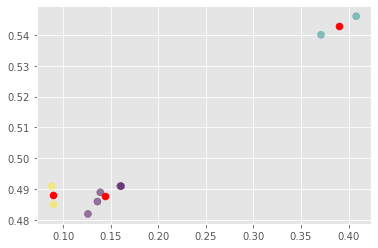

In [221]:
#Ploteamos los centroides de cada grupo:
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

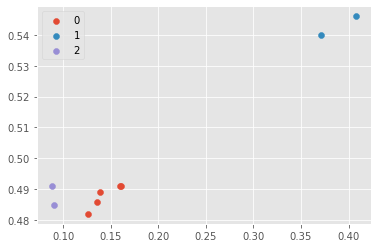

In [223]:
#Ploteamos cada grupo:

fig, ax = plt.subplots()
scatter_x = np.array(new_df["Cosine_Job_Desc"])
scatter_y = np.array(new_df['WMD_Job_Desc'])
group = np.array(kmeans.labels_)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

In [224]:
#Añadimos la columna al DF:
new_column =  kmeans.labels_
new_df['Result K-means'] = new_column
new_df

<ipython-input-224-f4b4b7017287>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Result K-means'] = new_column


,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result K-means
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489,0
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491,0
20,HCM_Federico_Calonge,Data Scientist,0.161,0.491,0
30,HCM_Robert_Smith,Data Scientist,0.136,0.486,0
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546,1
50,ML_Engineer_Jonathon_Price,Data Scientist,0.371,0.540,1
60,Security_Specialist_Ahmed Wayne,Data Scientist,0.126,0.482,0
70,Security_Specialist_Denis Banik,Data Scientist,0.088,0.491,2
80,Web_Dev_Alec_Dionisio,Data Scientist,0.090,0.485,2


/home/fedricio/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


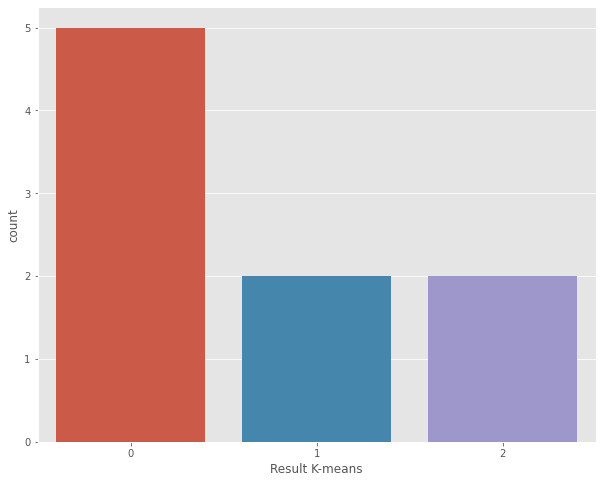

In [225]:
#Vemos la cantidad de "Result K-means" para los Candidatos:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.countplot(new_df['Result K-means'])
plt.show()

## 2-Aplicando KNN.

In [229]:
#En X colocamos únicamente las features numéricas 'Cosine_Job_Desc' y 'WMD_Job_Desc' para predecir la variable Y.
x_data = DF_J_and_C.drop(["Candidate_Name","Job_Title","Result K-means"],axis=1)

#En Y colocaremos nuestra variable a predecir / nuestro "target", 'Result K-means':
y = DF_J_and_C['Result K-means']

In [230]:
x_data

,Cosine_Job_Desc,WMD_Job_Desc
0,0.139,0.489
1,0.210,0.494
2,0.085,0.480
3,0.058,0.475
4,0.118,0.485
...,...,...
95,0.158,0.496
96,0.154,0.501
97,0.115,0.486
98,0.188,0.490


In [231]:
y

0     4
1     2
2     0
3     0
4     4
     ..
95    2
96    2
97    4
98    2
99    2
Name: Result K-means, Length: 100, dtype: int32

In [232]:
#KNN librerias:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [233]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,8) #Valores de K (1-25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0, 0.5, 'Testing Accuracy')

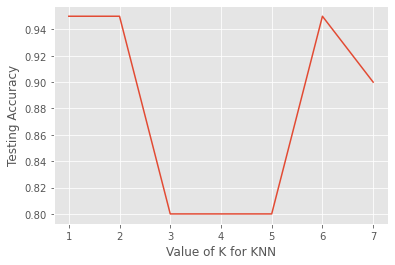

In [234]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [236]:
#Elegimos un K=2 ya que vemos que allí la eficiencia es del 0,95% (Alta) y nuestro algoritmo predecirá bien.

### Entrenamos al algoritmo de KNN con un K óptimo (K=2)

In [237]:
k_Optimo=2
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 0.95


##### 3-¿Qué pasa al añadir un nuevo Candidato (Web_Dev_Karen_Higgins)? ¿Qué se tiene que volver a calcular?

In [240]:
#Al agregar un nuevo candidato (aplica al puesto) se calcula el WMD y Cosine y se PREDICE con este modelo de KNN. 
#En esta predicción te clasifica de acuerdo a las 5 categorías que creamos con k-means.

##### 4-¿Qué pasa al añadir un nuevo Job Description (Data Scientist 2)? ¿Qué se tiene que volver a calcular?

In [238]:
#No pasa nada hasta que un Candidato aplica al puesto... y ahi pasa lo exṕlicado anteriormente en el punto 3 (justo arriba VER)

## 2-Aplicando KNN solo para Data Scientist.

In [226]:
#En X colocamos únicamente las features numéricas 'Cosine_Job_Desc' y 'WMD_Job_Desc' para predecir la variable Y.
x_data = new_df.drop(["Candidate_Name","Job_Title","Result K-means"],axis=1)

#En Y colocaremos nuestra variable a predecir / nuestro "target", 'Result K-means':
y = new_df['Result K-means']

In [227]:
x_data

,Cosine_Job_Desc,WMD_Job_Desc
0,0.139,0.489
10,0.160,0.491
20,0.161,0.491
30,0.136,0.486
40,0.408,0.546
50,0.371,0.540
60,0.126,0.482
70,0.088,0.491
80,0.090,0.485


In [228]:
y

0     0
10    0
20    0
30    0
40    1
50    1
60    0
70    2
80    2
Name: Result K-means, dtype: int32

In [175]:
#KNN librerias:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [176]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,8) #Valores de K (1-25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0, 0.5, 'Testing Accuracy')

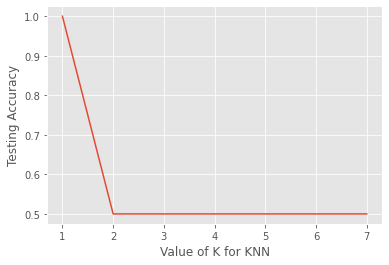

In [177]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [178]:
#Elegimos un K=2 ya que vemos que allí la eficiencia es del 0,95% (Alta) y nuestro algoritmo predecirá bien.

### Entrenamos al algoritmo de KNN con un K óptimo (K=2)

In [179]:
k_Optimo=1
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 1.0


##### 3-¿Qué pasa al añadir un nuevo Candidato (Web_Dev_Karen_Higgins)? ¿Qué se tiene que volver a calcular?

##### 4-¿Qué pasa al añadir un nuevo Job Description (Data Scientist 2)? ¿Qué se tiene que volver a calcular?